In [1]:
%matplotlib inline

import os
import zipfile
import urllib

DOWNLOAD_ROOT = "https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-scientist/P2/"
FOOD_PATH = os.path.join("datasets", "openfoodfacts")
FOOD_URL = DOWNLOAD_ROOT + "fr.openfoodfacts.org.products.csv.zip"

DOWNLOAD_DATA = False  # A la première exécution du notebook, ou pour rafraîchir les données, mettre cette variable à True



# Téléchargement et décompression des données

In [2]:
#PROXY_DEF = 'BNP'
PROXY_DEF = None

def fetch_food_data(food_url=FOOD_URL, food_path=FOOD_PATH):
    if not os.path.isdir(food_path):
        os.makedirs(food_path)
    archive_path = os.path.join(food_path, "fr.openfoodfacts.org.products.csv.zip")
    
    if (PROXY_DEF == 'BNP'):
        #create the object, assign it to a variable
        proxy = urllib.request.ProxyHandler({'https': 'https:/login:password@ncproxy:8080'})
        # construct a new opener using your proxy settings
        opener = urllib.request.build_opener(proxy)
        # install the openen on the module-level
        urllib.request.install_opener(opener)    
    
    urllib.request.urlretrieve(food_url, archive_path)
    food_archive = zipfile.ZipFile(archive_path)
    food_archive.extractall(path=food_path)
    food_archive.close()

In [3]:
if (DOWNLOAD_DATA == True):
    fetch_food_data()

# Import du fichier CSV

## Inspection de quelques lignes du fichier pour avoir un aperçu visuel du texte brut :

In [4]:
def read_raw_file(nblines, food_path = FOOD_PATH):
    csv_path = os.path.join(food_path, "fr.openfoodfacts.org.products.csv")
    
    fp = open(csv_path)
    
    line = ""
    
    for cnt_lines in range(nblines+1):
        line = fp.readline()
        
    print(">>>>>> Line %d" % (cnt_lines))
    print(line)
    
    

In [5]:
read_raw_file(0)

>>>>>> Line 0
code	url	creator	created_t	created_datetime	last_modified_t	last_modified_datetime	product_name	generic_name	quantity	packaging	packaging_tags	brands	brands_tags	categories	categories_tags	categories_fr	origins	origins_tags	manufacturing_places	manufacturing_places_tags	labels	labels_tags	labels_fr	emb_codes	emb_codes_tags	first_packaging_code_geo	cities	cities_tags	purchase_places	stores	countries	countries_tags	countries_fr	ingredients_text	allergens	allergens_fr	traces	traces_tags	traces_fr	serving_size	no_nutriments	additives_n	additives	additives_tags	additives_fr	ingredients_from_palm_oil_n	ingredients_from_palm_oil	ingredients_from_palm_oil_tags	ingredients_that_may_be_from_palm_oil_n	ingredients_that_may_be_from_palm_oil	ingredients_that_may_be_from_palm_oil_tags	nutrition_grade_uk	nutrition_grade_fr	pnns_groups_1	pnns_groups_2	states	states_tags	states_fr	main_category	main_category_fr	image_url	image_small_url	energy_100g	energy-from-fat_100g	fat_100g	saturated-

In [6]:
read_raw_file(1)
read_raw_file(2)
read_raw_file(3)
read_raw_file(4)
read_raw_file(5)

>>>>>> Line 1
0000000003087	http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao	openfoodfacts-contributors	1474103866	2016-09-17T09:17:46Z	1474103893	2016-09-17T09:18:13Z	Farine de blÃ© noir		1kg			Ferme t'y R'nao	ferme-t-y-r-nao																		en:FR	en:france	France																							en:to-be-completed, en:nutrition-facts-to-be-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-completed, en:packaging-to-be-completed, en:quantity-completed, en:product-name-completed, en:photos-to-be-validated, en:photos-uploaded	en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-completed,en:packaging-to-be-completed,en:quantity-completed,en:product-name-completed,en:photos-to-be-validated,en:photos-uploaded	A co

### On voit que le séparateur des données semble être la tabulation.
De plus, dans la documentation des différents champs qui a été fournie, il est indiqué d'utiliser le séparateur tabulation et l'encodage UTF-8 :
https://world.openfoodfacts.org/data/data-fields.txt

### On fait donc un chargement en spécifiant le séparateur tabulation, avec encodage utf-8


In [7]:
import pandas as pd

def load_food_data(food_path=FOOD_PATH):
    csv_path = os.path.join(food_path, "fr.openfoodfacts.org.products.csv")
    return pd.read_csv(csv_path, sep='\t', header=0, encoding='utf-8', low_memory=False)



### Puis on affiche quelques instances de données :

In [8]:
food = load_food_data()
food.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Correction d'une limitation de volume sur jupyter notebook

Lors de la première tentativement de chargement, j'ai eu l'erreur suivante à partir du poste Linux (cette erreur ne s'est pas produite sur le poste windows) :

IOPub data rate exceeded.  
The notebook server will temporarily stop sending output  
to the client in order to avoid crashing it.  
To change this limit, set the config variable  
`--NotebookApp.iopub_data_rate_limit`.  

Current values:  
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)  
NotebookApp.rate_limit_window=3.0 (secs)  


J'ai donc redémarré le jupyter notebook comme suit :  
$ jupyter notebook --generate-config  
Puis j'ai édité le fichier jupyter_notebook_config.py pour changer la valeur comme suit :  

c.NotebookApp.iopub_data_rate_limit = 10000000000  

Et j'ai relancé jupyter notebook  
Ensuite, j'ai pu relancer load_food_data() dans la cellule ci-dessus  

A partir du poste Windows je n'ai pas eu l'erreur ci-dessus, en revanche j'ai eu le warning suivant :  

C:\Users\a42692\.conda\envs\FBO\lib\site-packages\IPython\core\interactiveshell.py:3242: DtypeWarning: Columns  (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.  
  if (await self.run_code(code, result,  async_=asy)):  
  
  J'ai réglé ce warning en rajoutant low_memory=False à la fonction pd.read_csv. Avec ce paramètre, pandas charge d'abord le tableau en entier dans la RAM afin de pouvoir déterminer dynamiquement le type de chaque instance.

# Inspection générale des données

In [9]:
#pd.options.display.max_columns = 1000
pd.set_option("display.max_columns", 1000)
pd.set_option("display.max_rows",100)

In [10]:
food.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ]

In [11]:
food.tail()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,Tomato & ricotta,NaN,1,Plastique,plastique,Panzani,panzani,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:RO,en:romania,Roumanie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,NaN,Plastique,plastique,Trader Joe's,trader-joe-s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Organic peppermint, organic lemon grass, organ...",NaN,NaN,NaN,NaN

## Affichage des colonnes :

In [12]:
food.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 162 columns):
code                                          320749 non-null object
url                                           320749 non-null object
creator                                       320770 non-null object
created_t                                     320769 non-null object
created_datetime                              320763 non-null object
last_modified_t                               320772 non-null object
last_modified_datetime                        320772 non-null object
product_name                                  303010 non-null object
generic_name                                  52795 non-null object
quantity                                      104819 non-null object
packaging                                     78960 non-null object
packaging_tags                                78961 non-null object
brands                                        292360 non-null o

In [13]:
food.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,229554.000000,0.0,0.0,1.0,2.000000,4.000000,1.0,1.0,1.0,24.000000,23.000000,0.0,0.0,1.0,0.0,22823.000000,22859.000000,841.000000,186.000000,38.000000,78.000000,188.000000,149.000000,8.000000,24.000000,23.000000,21.000000,13.000000,0.0,1.400000e+01,0.0,0.0,0.0,143298.000000,144090.000000,243588.000000,244971.000000,72.000000,26.000000,38.000000,262.000000,4.000000,11.000000,266.000000,414.000000,200886.000000,259922.000000,27.000000,16.000000,9.000000,255510.000000,255463.000000,4133.000000,137554.000000,34.000000,7057.000000,1340.000000,918.000000,140867.000000,11154.000000,10815.000000,11729.000000,6784.000000,5240.000000,3042.000000,5.300000e+03,330.000000,2483.000000,38.000000,81.000000,24748.000000,158.000000,141050.000000,5845.000000,140462.000000,6253.000000,3929.000000,2106.000000,1620.000000,79.000000,1168.000000,20.000000,11.000000,259.000000,78.000000,29.000000,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,5.129932,NaN,NaN,7.4,6.040000,36.136182,18.9,8.1,3.0,10.752667,10.673913,NaN,NaN,61.0,NaN,10.425055,6.312493,3.182103,2.250285,3.186553,1.635462,16.229144,3.823819,0.057000,0.153842,0.061567,40.192857,25.123077,NaN,1.357143e-06,NaN,NaN,NaN,0.073476,0.020071,32.073981,16.003484,11.841667,2.878846,25.897368,6.354084,24.325000,12.163636,31.925000,49.790389,2.862111,7.075940,4.658148,2.506250,0.021678,2.028624,0.798815,7.838105,0.000397,0.518715,0.000008,0.056705,0.034219,0.023367,0.325574,0.259007,0.020303,0.023378,0.006898,0.205856,8.938696e-05,0.121290,0.072138,0.013123,0.119052,0.424635,0.092638,0.125163,0.617282,0.003652,0.534143,0.007950,0.025794,0.003014,0.012161,0.003126,0.001690,0.000401,0.000427,1.594563,0.145762,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,8.014238,NaN,NaN,NaN,0.226274,24.101433,NaN,NaN,NaN,4.019993,3.379647,NaN,NaN,NaN,NaN,17.0761

### Premiers constats :
#### De nombreux champs ont très peu de valeurs renseignées, voire aucune
#### Certaines colonnes sont présentes dans le fichier CSV mais pas dans l'url de description des champs fournie :

allergens 28344 non-null object

allergens_fr 19 non-null object

traces_fr 24352 non-null object

additives_fr 154680 non-null object

nutrition_grade_uk (mais 0 valeurs sont présentes)

pnns_groups_1  91513 non-null object

pnns_groups_2  94491 non-null object

states         320726 non-null object

states_tags    320726 non-null object

states_fr      320726 non-null object      



### Des url sont fournies pour les produits.  Voir si on pourra compléter les données avec les url fournies :

In [14]:
pd.options.display.max_colwidth = 100
food['url']

0                  http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao
1                        http://world-fr.openfoodfacts.org/produit/0000000004530/banana-chips-sweetened-whole
2                                http://world-fr.openfoodfacts.org/produit/0000000004559/peanuts-torn-glasser
3                    http://world-fr.openfoodfacts.org/produit/0000000016087/organic-salted-nut-mix-grizzlies
4                      http://world-fr.openfoodfacts.org/produit/0000000016094/organic-polenta-bob-s-red-mill
                                                         ...                                                 
320767                         http://world-fr.openfoodfacts.org/produit/9948282780603/tomato-ricotta-panzani
320768    http://world-fr.openfoodfacts.org/produit/99567453/mint-melange-tea-a-blend-of-peppermint-lemon-...
320769    http://world-fr.openfoodfacts.org/produit/9970229501521/%E4%B9%90%E5%90%A7%E6%B3%A1%E8%8F%9C%E5%...
320770    

### Un clic sur un ensemble d'url ci-dessus montre qu'elles ne fonctionnent pas : on ne pourra donc pas y récupérer des informations additionnelles
Pour aller plus loin, on note que la colonne "creator" contient l'origine des données : on pourra donc remonter jusqu'à l'origine de ces données pour essayer d'avoir plus d'informations si nécessaire.

On ne va pas creuser cet aspect qui risque de prendre beaucoup de temps et qui est hors périmètre du projet, et on va se concentrer sur les données qui sont déjà à notre disposition.

## Analyse plus détaillée des données et des colonnes manquantes
Le code source de l'analyse du pourcentage de colonnes manquantes a été trouvé sur :   
https://www.kaggle.com/daveianhickey/can-we-trust-open-food-facts



In [15]:
def analyse_donnees_manquantes(df):
    cols = df.columns
    low_data_cols = []
    missing_pct = {}

    for c in cols:
        empty_pct = round(len(df[pd.isnull(df[c])])/df.shape[0],2)
        if empty_pct >= 0.7:
            missing_pct[c]=empty_pct
            low_data_cols.append(c)

    low = round((len(low_data_cols)/len(cols))*100,2)
    print(low,"% des colonnes ont >=70% de données manquantes. \nCes colonnes sont:")
    #print(len(food_fr['creator'].isnull()))
    print(missing_pct)
    
analyse_donnees_manquantes(food)

73.46 % des colonnes ont >=70% de données manquantes. 
Ces colonnes sont:
{'generic_name': 0.84, 'packaging': 0.75, 'packaging_tags': 0.75, 'categories': 0.74, 'categories_tags': 0.74, 'categories_fr': 0.74, 'origins': 0.93, 'origins_tags': 0.93, 'manufacturing_places': 0.89, 'manufacturing_places_tags': 0.89, 'labels': 0.85, 'labels_tags': 0.85, 'labels_fr': 0.85, 'emb_codes': 0.91, 'emb_codes_tags': 0.91, 'first_packaging_code_geo': 0.94, 'cities': 1.0, 'cities_tags': 0.94, 'purchase_places': 0.82, 'stores': 0.84, 'allergens': 0.91, 'allergens_fr': 1.0, 'traces': 0.92, 'traces_tags': 0.92, 'traces_fr': 0.92, 'no_nutriments': 1.0, 'ingredients_from_palm_oil': 1.0, 'ingredients_from_palm_oil_tags': 0.98, 'ingredients_that_may_be_from_palm_oil': 1.0, 'ingredients_that_may_be_from_palm_oil_tags': 0.96, 'nutrition_grade_uk': 1.0, 'pnns_groups_1': 0.71, 'pnns_groups_2': 0.71, 'main_category': 0.74, 'main_category_fr': 0.74, 'image_url': 0.76, 'image_small_url': 0.76, 'energy-from-fat_100g'

### On voit que 73.46 % des colonnes ont >=70% de données manquantes

## Filtre sur les produits vendus en France
L'objectif étant de préparer des données pour des recettes pour un site français, on va faire l'hypothèse que les produits de ces recettes sont vendus en France.
=> **Poser la question au client pour confirmer**

#### Consultation des valeurs des tags des pays pour voir sur quelles valeurs filtrer pour conserver uniquement la France :

In [16]:
food['countries_tags'].value_counts()

en:united-states                                                                                                                            172998
en:france                                                                                                                                    94391
en:switzerland                                                                                                                               14953
en:germany                                                                                                                                    7870
en:spain                                                                                                                                      5009
                                                                                                                                             ...  
en:japan,en:日本                                                                                                        

In [17]:
food_fr = food[food['countries_tags'].str.contains("france")==True].copy()

In [18]:
food_fr.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98440 entries, 0 to 320770
Data columns (total 162 columns):
code                                          98440 non-null object
url                                           98440 non-null object
creator                                       98440 non-null object
created_t                                     98440 non-null object
created_datetime                              98439 non-null object
last_modified_t                               98440 non-null object
last_modified_datetime                        98440 non-null object
product_name                                  91247 non-null object
generic_name                                  38291 non-null object
quantity                                      71237 non-null object
packaging                                     58971 non-null object
packaging_tags                                58971 non-null object
brands                                        86426 non-null object
brand

## Nouvelle analyse des données manquantes, avec uniquement les produits vendus en France

In [19]:
analyse_donnees_manquantes(food_fr)

67.28 % des colonnes ont >=70% de données manquantes. 
Ces colonnes sont:
{'origins': 0.84, 'origins_tags': 0.84, 'manufacturing_places': 0.73, 'manufacturing_places_tags': 0.74, 'emb_codes': 0.77, 'emb_codes_tags': 0.77, 'first_packaging_code_geo': 0.81, 'cities': 1.0, 'cities_tags': 0.8, 'allergens': 0.77, 'allergens_fr': 1.0, 'traces': 0.81, 'traces_tags': 0.81, 'traces_fr': 0.81, 'serving_size': 0.73, 'no_nutriments': 1.0, 'ingredients_from_palm_oil': 1.0, 'ingredients_from_palm_oil_tags': 0.96, 'ingredients_that_may_be_from_palm_oil': 1.0, 'ingredients_that_may_be_from_palm_oil_tags': 0.94, 'nutrition_grade_uk': 1.0, 'energy-from-fat_100g': 1.0, 'butyric-acid_100g': 1.0, 'caproic-acid_100g': 1.0, 'caprylic-acid_100g': 1.0, 'capric-acid_100g': 1.0, 'lauric-acid_100g': 1.0, 'myristic-acid_100g': 1.0, 'palmitic-acid_100g': 1.0, 'stearic-acid_100g': 1.0, 'arachidic-acid_100g': 1.0, 'behenic-acid_100g': 1.0, 'lignoceric-acid_100g': 1.0, 'cerotic-acid_100g': 1.0, 'montanic-acid_100g': 1

# Première sélection des features à nettoyer et analyser

Vu le nombre important de colonnes disponibles, il va falloir faire une sélection par rapport à l'objectif, c'est à dire par rapport aux principes de base d'une alimentation saine

## Recherche sur les principes de base d'une alimentation saine

####  Scoring de la qualité nutritionnelle

Pour faire ce scoring, on peut utiliser :
* le nutriscore : https://quoidansmonassiette.fr/comment-est-calcule-le-nutri-score-logo-nutritionnel/  
* un scoring fondé sur le nutriscore en intégrant également les notions d'additifs et de bio, comme ce que fait par exemple l'application Yuka : https://yuka.io/questions/notation-produits-alimentaires/

#### Dimension écologique
Si on souhaite intégrer la dimension écologique, on pourra prendre en compte la présence d'huile de palme dans les aliments

#### Consommer un maximum de « raw food » (produits bruts non transformés) avec une priorité absolue sur les fruits et légumes
Eviter les aliments trop sucrés  
privilégier le bio français  (versus bio industriel intensif dont la charte change d'un pays à l'autre)  

Source : https://alimentsain.fr/  


#### manger des produits de saison :
Indiqués ici : https://alimentsain.fr/aliment/calendrier-fruits-legumes/


#### Fruits, aliments riches en fibres, poissons gras (saumon, sardine, maquereau), légumineuses ( : haricots, lentilles, soja, pois entiers ou cassés, pois chiches, fèves, luzerne ou lupins), fruits secs, viande blanche, huile végétale

#### Alimentation variée et équilibrée

####  Eviter les additifs alimentaires considérés comme nocifs / cancérigènes

#### Eviter les aliments trop salés

#### Selon l'Organisation mondiale de la santé, un régime alimentaire sain est composé des éléments suivants1 :

    des fruits, des légumes, des légumes secs (comme des lentilles et des pois), des fruits secs et des céréales complètes (par exemple du maïs, millet, avoine, blé et riz brun non transformés)1
    au moins 400 g (soit 5 portions) de fruits et légumes par jour, hors pommes de terre, patates douces, manioc et autres racines amylacées1
    moins de 10 % de l’apport énergique total provenant de sucres libres, soit l’équivalent de 50 g (ou environ 12 cuillères à café rases) pour une personne de poids normal consommant environ 2000 calories par jour ; dans l’idéal, pour préserver davantage la santé, cette part devrait être inférieure à 5 % des apports énergiques totaux1
    moins de 30 % de l’apport énergétique total provenant des matières grasses. Les graisses insaturées (poisson, avocat et noix, et les huiles de tournesol, de soja, de colza et d’olive) sont à préférer aux graisses saturées (viande grasse, beurre, huile de palme et de noix de coco, crème, fromage, beurre clarifié et saindoux) et aux acides gras trans (aliments industriels et viande et produits laitiers provenant des animaux ruminants). Il est proposé de réduire l’apport en graisses saturées à moins de 10 % de l’apport énergétique total et celui en acides gras trans à moins de 1 % ; les acides gras trans sont à exclure d'une alimentation saine1.
    moins de 5 g de sel (soit environ une cuillère à café) par jour, de préférence iodé1

Source : Wikipedia


####  AJR (Apports Journaliers Recommandés) en France :

Nutriment 	Apport journalier recommandé  
Vitamine A (rétinol) 	800 μg  
Vitamine B1 (thiamine) 	1,1 mg  
Vitamine B2 (riboflavine) 	1,4 mg  
Vitamine B3 (ou PP, niacine) 	16 mg  
Vitamine B5 (acide pantothénique) 	6 mg  
Vitamine B6 (pyridoxine) 	1,4 mg  
Vitamine B8 ou H (biotine) 	50 μg  
Vitamine B9 (acide folique)(Folacine) 	200 μg  
Vitamine B12 (cobalamine) 	2,5 μg  
Vitamine C (acide ascorbique) 	80 mg  
Vitamine D (cholécalciférol) 	5 μg  
Vitamine E (tocophérol) 	12 mg  
Vitamine K (anti-AVK) 	75 μg  
Calcium 	800 mg  
Fer 	14 mg  
Iode 	150 μg  
Magnésium 	375 mg  
Phosphore 	700 mg  
Sélénium 	55 μg  
Zinc 	10 mg  
Potassium 	2 000 mg  
Chlorure 	800 mg  
Cuivre 	1 mg  
Manganèse 	2 mg  
Fluorure 	3,5 mg  
Chrome 	40 μg  
Molybdène 	50 μg  

Source: Wikipedia : https://fr.wikipedia.org/wiki/Apports_journaliers_recommand%C3%A9s



In [20]:
food['main_category_fr'].value_counts()

Boissons                                   6054
Epicerie                                   2902
Chocolats                                  2789
Aliments et boissons à base de végétaux    2745
Conserves                                  2519
                                           ... 
Jambonneaux                                   1
en:Free-range-british-eggs                    1
ru:Продукт-творожный-мдж-5-5                  1
en:Cinnamon-cookies                           1
en:Fruit-drinks                               1
Name: main_category_fr, Length: 3543, dtype: int64

## Première sélection de features
#### A partir des éléments ci-dessus voici une première sélection des features qui seront importantes à considérer :
Pour aider à la sélection des features, on utilise la cellule juste au dessus pour afficher leurs valeurs possibles.  
Par exemple quand on se pose la question de conserver main_category_fr, on peut faire :  
food['main_category_fr'].value_counts()

#### Et voici les features que l'on a enlevé :

In [21]:
food_filtered = food.drop(['packaging', 'packaging_tags', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'countries', 'countries_fr','allergens_fr','traces','traces_fr','no_nutriments','serving_size','additives','additives_fr','cocoa_100g','ingredients_from_palm_oil','ingredients_that_may_be_from_palm_oil','nutrition_grade_uk','butyric-acid_100g','caproic-acid_100g','caprylic-acid_100g','capric-acid_100g','lauric-acid_100g','myristic-acid_100g','palmitic-acid_100g','stearic-acid_100g','arachidic-acid_100g','behenic-acid_100g','lignoceric-acid_100g','cerotic-acid_100g','montanic-acid_100g','melissic-acid_100g','omega-3-fat_100g','alpha-linolenic-acid_100g','eicosapentaenoic-acid_100g','docosahexaenoic-acid_100g','omega-6-fat_100g','linoleic-acid_100g','arachidonic-acid_100g','gamma-linolenic-acid_100g','dihomo-gamma-linolenic-acid_100g','omega-9-fat_100g','oleic-acid_100g','elaidic-acid_100g','gondoic-acid_100g','mead-acid_100g','erucic-acid_100g','nervonic-acid_100g','sucrose_100g','glucose_100g','fructose_100g','lactose_100g','maltose_100g','maltodextrins_100g','starch_100g','polyols_100g','casein_100g','serum-proteins_100g','nucleotides_100g','beta-carotene_100g','biotin_100g','silica_100g','bicarbonate_100g','chloride_100g','fluoride_100g', 'chromium_100g','molybdenum_100g','caffeine_100g','taurine_100g','ph_100g','chlorophyl_100g','glycemic-index_100g','water-hardness_100g','collagen-meat-protein-ratio_100g','ingredients_from_palm_oil_tags','ingredients_that_may_be_from_palm_oil_tags','states','states_fr','main_category'], axis=1)
food_filtered_fr = food_fr.drop(['packaging', 'packaging_tags', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'countries', 'countries_fr','allergens_fr','traces','traces_fr','no_nutriments','serving_size','additives','additives_fr','cocoa_100g','ingredients_from_palm_oil','ingredients_that_may_be_from_palm_oil','nutrition_grade_uk','butyric-acid_100g','caproic-acid_100g','caprylic-acid_100g','capric-acid_100g','lauric-acid_100g','myristic-acid_100g','palmitic-acid_100g','stearic-acid_100g','arachidic-acid_100g','behenic-acid_100g','lignoceric-acid_100g','cerotic-acid_100g','montanic-acid_100g','melissic-acid_100g','omega-3-fat_100g','alpha-linolenic-acid_100g','eicosapentaenoic-acid_100g','docosahexaenoic-acid_100g','omega-6-fat_100g','linoleic-acid_100g','arachidonic-acid_100g','gamma-linolenic-acid_100g','dihomo-gamma-linolenic-acid_100g','omega-9-fat_100g','oleic-acid_100g','elaidic-acid_100g','gondoic-acid_100g','mead-acid_100g','erucic-acid_100g','nervonic-acid_100g','sucrose_100g','glucose_100g','fructose_100g','lactose_100g','maltose_100g','maltodextrins_100g','starch_100g','polyols_100g','casein_100g','serum-proteins_100g','nucleotides_100g','beta-carotene_100g','biotin_100g','silica_100g','bicarbonate_100g','chloride_100g','fluoride_100g', 'chromium_100g','molybdenum_100g','caffeine_100g','taurine_100g','ph_100g','chlorophyl_100g','glycemic-index_100g','water-hardness_100g','collagen-meat-protein-ratio_100g','ingredients_from_palm_oil_tags','ingredients_that_may_be_from_palm_oil_tags','states','states_fr','main_category'], axis=1)

In [22]:
food_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 82 columns):
code                                       320749 non-null object
url                                        320749 non-null object
creator                                    320770 non-null object
created_t                                  320769 non-null object
created_datetime                           320763 non-null object
last_modified_t                            320772 non-null object
last_modified_datetime                     320772 non-null object
product_name                               303010 non-null object
generic_name                               52795 non-null object
quantity                                   104819 non-null object
brands                                     292360 non-null object
brands_tags                                292352 non-null object
categories                                 84410 non-null object
categories_tags                  

In [23]:
food_filtered_fr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98440 entries, 0 to 320770
Data columns (total 82 columns):
code                                       98440 non-null object
url                                        98440 non-null object
creator                                    98440 non-null object
created_t                                  98440 non-null object
created_datetime                           98439 non-null object
last_modified_t                            98440 non-null object
last_modified_datetime                     98440 non-null object
product_name                               91247 non-null object
generic_name                               38291 non-null object
quantity                                   71237 non-null object
brands                                     86426 non-null object
brands_tags                                86422 non-null object
categories                                 61955 non-null object
categories_tags                            61

In [24]:
analyse_donnees_manquantes(food_filtered)

56.1 % des colonnes ont >=70% de données manquantes. 
Ces colonnes sont:
{'generic_name': 0.84, 'categories': 0.74, 'categories_tags': 0.74, 'categories_fr': 0.74, 'origins': 0.93, 'origins_tags': 0.93, 'manufacturing_places': 0.89, 'manufacturing_places_tags': 0.89, 'labels': 0.85, 'labels_tags': 0.85, 'labels_fr': 0.85, 'cities_tags': 0.94, 'purchase_places': 0.82, 'stores': 0.84, 'allergens': 0.91, 'traces_tags': 0.92, 'pnns_groups_1': 0.71, 'pnns_groups_2': 0.71, 'main_category_fr': 0.74, 'image_url': 0.76, 'image_small_url': 0.76, 'energy-from-fat_100g': 1.0, 'monounsaturated-fat_100g': 0.93, 'polyunsaturated-fat_100g': 0.93, 'alcohol_100g': 0.99, 'vitamin-d_100g': 0.98, 'vitamin-e_100g': 1.0, 'vitamin-k_100g': 1.0, 'vitamin-b1_100g': 0.97, 'vitamin-b2_100g': 0.97, 'vitamin-pp_100g': 0.96, 'vitamin-b6_100g': 0.98, 'vitamin-b9_100g': 0.98, 'folates_100g': 0.99, 'vitamin-b12_100g': 0.98, 'pantothenic-acid_100g': 0.99, 'potassium_100g': 0.92, 'phosphorus_100g': 0.98, 'magnesium_100g'

In [25]:
analyse_donnees_manquantes(food_filtered_fr)

46.34 % des colonnes ont >=70% de données manquantes. 
Ces colonnes sont:
{'origins': 0.84, 'origins_tags': 0.84, 'manufacturing_places': 0.73, 'manufacturing_places_tags': 0.74, 'cities_tags': 0.8, 'allergens': 0.77, 'traces_tags': 0.81, 'energy-from-fat_100g': 1.0, 'monounsaturated-fat_100g': 0.99, 'polyunsaturated-fat_100g': 0.99, 'trans-fat_100g': 1.0, 'cholesterol_100g': 1.0, 'alcohol_100g': 0.98, 'vitamin-a_100g': 0.99, 'vitamin-d_100g': 0.99, 'vitamin-e_100g': 0.99, 'vitamin-k_100g': 1.0, 'vitamin-c_100g': 0.99, 'vitamin-b1_100g': 0.99, 'vitamin-b2_100g': 0.99, 'vitamin-pp_100g': 0.99, 'vitamin-b6_100g': 0.99, 'vitamin-b9_100g': 0.99, 'folates_100g': 1.0, 'vitamin-b12_100g': 0.99, 'pantothenic-acid_100g': 1.0, 'potassium_100g': 1.0, 'calcium_100g': 0.98, 'phosphorus_100g': 0.99, 'iron_100g': 0.99, 'magnesium_100g': 0.99, 'zinc_100g': 1.0, 'copper_100g': 1.0, 'manganese_100g': 1.0, 'selenium_100g': 1.0, 'iodine_100g': 1.0, 'fruits-vegetables-nuts_100g': 0.97, 'carbon-footprint_10

In [26]:
food_filtered_fr.describe()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,pantothenic-acid_100g,potassium_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,selenium_100g,iodine_100g,fruits-vegetables-nuts_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,53466.000000,53466.000000,53466.000000,6.459300e+04,30.000000,47642.000000,62375.000000,1186.000000,1205.000000,386.000000,415.000000,47211.000000,62515.000000,45723.000000,64318.000000,62574.000000,62571.000000,2418.000000,589.000000,591.000000,791.000000,72.000000,1297.000000,860.000000,646.000000,710.000000,746.000000,690.000000,2.000000,5.550000e+02,4.260000e+02,337.000000,2257.000000,563.000000,1185.000000,815.000000,231.000000,119.000000,108.000000,9.200000e+01,1.210000e+02,2971.000000,176.000000,61415.000000,61415.000000
mean,1.856619,0.069839,0.148281,1.171553e+03,547.471667,13.332232,5.423696,18.574106,9.807383,0.209285,0.041158,27.759277,13.432792,2.559271,7.754531,1.160535,0.456924,9.136038,0.000627,0.000005,0.052269,0.000517,0.125570,0.298463,0.005076,0.067138,0.186858,0.002184,0.000147,7.271086e-04,8.483711e-03,0.911889,0.325133,0.287926,0.044379,0.234942,0.017869,0.319860,0.017846,3.777380e-04,3.501963e-04,31.546439,366.265368,8.683204,8.362810
std,2.561405,0.258593,0.450784,1.283590e+04,574.728341,16.926708,8.531083,21.960039,14.992141,0.984866,0.535806,27.413340,19.087618,4.634788,7.887373,4.309815,1.696759,10.597055,0.005574,0.000018,0.631852,0.003939,2.800254,6.330165,0.061747,0.735266,3.633147,0.033010,0.000046,1.697901e-02,6.781982e-02,4.063764,1.739698,0.382479,0.757976,1.968875,0.185784,3.446577,0.096645,3.131559e-03,8.859487e-04,32.055360,403.553375,9.046131,9.384056
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,0.000000,0.000000,0.000000,0.000002,0.000000,0.000007,0.000114,0.000000e+00,9.000000e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000300,0.000022,0.000001,2.500000e-08,7.500000e-07,0.000000,0.000000,-15.000000,-15.000000
25%,0.000000,0.000000,0.000000,4.270000e+02,62.900000,1.300000,0.300000,2.600000,1.500000,0.000000,0.000000,4.000000,1.000000,0.000000,1.800000,0.080000,0.031496,1.000000,0.000058,0.000001,0.001800,0.000004,0.012000,0.000330,0.000320,0.003500,0.000320,0.000050,0.000130,5.850000e-07,9.000000e-04,0.027600,0.120000,0.159000,0.002400,0.044000,0.000950,0.000090,0.000038,4.025000e-06,1.600000e-05,0.000000,149.750000,1.000000,0.000000
50%,1.000000,0.000000,0.000000,1.035000e+03,208.500000,6.800000,2.000000,9.100000,3.500000,0.000000,0.000000,14.500000,4.100000,1.380000,6.000000,0.558800,0.220000,6.000000,0.000120,0.000002,0.005500,0.000010,0.020000,0.000630,0.001100,0.009100,0.000840,0.000130,0.000147,1.700000e-06,2.328500e-03,0.214000,0.130000,0.230000,0.005000,0.098000,0.002000,0.000325,0.000160,1.245000e-05,5.500000e-05,24.000000,219.500000,9.000000,7.000000
75%,3.000000,0.000000,0.000000,1.649000e+03,881.500000,21.000000,7.400000,26.000000,11.000000,0.115000,0.005440,53.000000,17.800000,3.200000,11.000000,1.244600,0.490000,12.500000,0.000464,0.000005,0.012000,0.000036,0.030000,0.000933,0.001200,0.013300,0.001200,0.000170,0.000163,2.100000e-06,5.100000e-03,0.618000,0.330000,0.350000,0.008000,0.155000,0.005200,0.000789,0.001325,2.337500e-05,1.030000e-04,51.000000,485.000000,15.000000,16.000000
max,31.000000,2.000000,5.000000,3.251373e+06,1830.000000,380.000000,210.000000,82.000

In [27]:
food_filtered_fr.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,cities_tags,purchase_places,stores,countries_tags,ingredients_text,allergens,traces_tags,additives_n,additives_tags,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states_tags,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,pantothenic-acid_100g,potassium_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,selenium_100g,iodine_100g,fruits-vegetables-nuts_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expirati...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0000000024600,http://world-fr.openfoodfacts.org/produit/0000000024600/filet-de-boeuf,date-limite-app,1434530704,2015-06-17T08:45:04Z,1434535914,2015-06-17T10:11:54Z,Filet de bœuf,NaN,2.46 kg,NaN,NaN,Filet de bœuf,fr:filet-de-boeuf,Filet-de-boeuf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expirati...",Filet-de-boeuf,http://fr.openfoodfacts.org/images/products/000/000/002/4600/front.3.400.jpg,http://fr.openfoodfacts.org/images/products/000/000/002/4600/front.3.200.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,0000000027205,http://world-fr.openfoodfacts.org/produit/0000000027205,tacinte,1458238630,2016-03-17T18:17:10Z,1458238638,2016-03-17T18:17:18Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expirati...",NaN,http://fr.openfoodfacts.org/images/products/000/000/002/7205/front.3.400.jpg,http://fr.openfoodfacts.org/images/products/000/000/002/7205/front.3.200.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,0000000036252,http://world-fr.openfoodfacts.org/produit/0000000036252/lion-peanut-x2-sunridge,tacinte,1422221701,2015-01-25T21:35:01Z,1489055667,2017-03-09T10:34:27Z,Lion Peanut x2,NaN,NaN,Sunridge,sunridge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Roissy,France",NaN,"en:france,en:united-states","Milk chocolate coating (evaporated cane juice, cocoa butter, unsweetened chocolate, whole milk p...",NaN,NaN,1.0,en:e322,0.0,0.0,e,unknown,unknown,"en:to-be-completed,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-to-b...",NaN,http://fr.openfoodfacts.org/images/products/000/000/003/6252/front.4.400.jpg,http://fr.

## Vérfication s'il y a des doublons

In [28]:
food[food.duplicated()]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g


## Affichage des champs renseignés (non NA) avec leur pourcentage de complétude
L'objectif est de voir quelles sont les features qui seront les plus fiables en terme de qualité de donnée, et quelles sont celles pour lesquelles on devra faire des choix

In [29]:
(food_filtered.count()/food_filtered.shape[0]).sort_values(axis=0, ascending=False)

last_modified_t                            1.000000
last_modified_datetime                     1.000000
creator                                    0.999994
created_t                                  0.999991
created_datetime                           0.999972
code                                       0.999928
url                                        0.999928
states_tags                                0.999857
countries_tags                             0.999127
product_name                               0.944627
brands                                     0.911426
brands_tags                                0.911401
energy_100g                                0.814014
proteins_100g                              0.810301
salt_100g                                  0.796547
sodium_100g                                0.796401
ingredients_text                           0.776134
additives_n                                0.776062
ingredients_from_palm_oil_n                0.776062
ingredients_

In [30]:
(food_filtered_fr.count()/food_filtered_fr.shape[0]).sort_values(axis=0, ascending=False)

code                                       1.000000
states_tags                                1.000000
url                                        1.000000
creator                                    1.000000
created_t                                  1.000000
last_modified_t                            1.000000
last_modified_datetime                     1.000000
countries_tags                             1.000000
created_datetime                           0.999990
product_name                               0.926930
brands                                     0.877956
brands_tags                                0.877915
quantity                                   0.723659
pnns_groups_2                              0.681004
pnns_groups_1                              0.659092
energy_100g                                0.656166
proteins_100g                              0.653373
salt_100g                                  0.635656
sodium_100g                                0.635626
sugars_100g 

# Affiner la sélection des features
## Features les plus importantes pour chaque critère d'une alimentation de qualité
Pour chaque critère de recherche réalisée en début de document sur les principes de base d'une alimentation saine, voici les features que l'on pourra appliquer avec leur pourcentage de champs renseignés (non NA) :

####  Scoring de la qualité nutritionnelle
Choisir entre l'une des 2 variables pour le nutrition score (numérique) ou grade (lettre) :  
nutrition-score-fr_100g                    0.623883  
nutrition_grade_fr                         0.623883

energy_100g                                0.656166  
salt_100g                                  0.635656  
sodium_100g                                0.635626  
sugars_100g                                0.635057  
saturated-fat_100g                         0.633635  

% de fruits et légumes :
fruits-vegetables-nuts_100g                0.030181  
=> Cette donnée n'est pas assez renseignée.  On ne pourra donc pas se baser dessus.

fiber_100g                                 0.464476  
proteins_100g                              0.653373  


la teneur en sodium correspond à la teneur en sel mentionnée sur la déclaration obligatoire divisée par 2,5. 
(Source : Nutri-score_reglement_usage_041019.pdf page 14)

=> On construira 1 feature de teneur en sodium à partir des 2 features sodium_100g et salt_100g


#### Dimension écologique
ingredients_from_palm_oil_n                0.543133  
ingredients_that_may_be_from_palm_oil_n    0.543133  

#### Consommer un maximum de « raw food » (produits bruts non transformés) avec une priorité absolue sur les fruits et légumes
Pour reconnaître les légumes :

pnns_groups_2                              0.681004    =  'Legumes', 'Vegetables', 'vegetables' , 'fruits', legumes'  
pnns_groups_1                              0.659092    =  'Fruits and vegetables'  

#### privilégier le bio français  (versus bio industriel intensif dont la charte change d'un pays à l'autre)  
Combiner les 3 features ci-dessous pour reconnaître le bio et le bio français :   
labels_tags                                0.356959  
labels_fr                                  0.356959  
labels                                     0.356573  

Pour récupérer les produits vendus en France :
countries_tags                             1.000000  

#### manger des produits de saison :
On pourrait construire un tableau contenant les produits par saison de manière à proposer des recettes ciblées selon la date.

En récupérant par exemple les informations ici :
https://alimentsain.fr/aliment/calendrier-fruits-legumes/

Mais il s'agit d'une source de données externe hors périmètre de ce projet. 


#### Fruits, aliments riches en fibres, poissons gras (saumon, sardine, maquereau), légumineuses ( : haricots, lentilles, soja, pois entiers ou cassés, pois chiches, fèves, luzerne ou lupins), fruits secs, viande blanche, huile végétale
Intégré en grande partie dans le nutriscore.

#### Alimentation variée et équilibrée

####  Eviter les additifs alimentaires considérés comme nocifs / cancérigènes
additives_tags                             0.309386  

Il sera nécessaire de croiser avec une source de données externe pour identifier les additifs cancérigènes

#### Eviter les aliments trop salés
Intégré dans le nutriscore


####  AJR (Apports Journaliers Recommandés) en France :
Les features concernées ne sont pas assez représentées dans les données fournies.
On ne pourra pas les utiliser :

vitamin-b1_100g                            0.008736  
magnesium_100g                             0.008279  
vitamin-e_100g                             0.008035  
vitamin-b6_100g                            0.007578  
vitamin-pp_100g                            0.007213  
vitamin-b9_100g                            0.007009  
vitamin-b2_100g                            0.006562  
vitamin-d_100g                             0.006004  
vitamin-a_100g                             0.005983  
phosphorus_100g                            0.005719  
vitamin-b12_100g                           0.005638  


On pourra égalementconserver l'url de l'image du produit afin de permettre au client de faire des visuels :  
image_url                                  0.533726

Ainsi que le code produit, la date de modification, le nom du produit, les marques et la catégorie :

code                                       1.000000
last_modified_t                            1.000000
product_name                               0.926930
brands                                     0.877956
brands_tags                                0.877915
main_category_fr                           0.629368


# Nettoyage des données pour les features cibles (cette partie reste à réaliser)

## Conserver uniquement les features retenues

In [31]:
food_filtered2 = food_filtered[['code', 'last_modified_t', 'product_name' ,'main_category_fr','brands','brands_tags','nutrition-score-fr_100g','nutrition_grade_fr','energy_100g','salt_100g','sodium_100g','sugars_100g','saturated-fat_100g','fiber_100g','proteins_100g','ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n','pnns_groups_2','pnns_groups_1','labels_tags','labels_fr','labels','countries_tags','additives_tags','image_url']]
food_filtered_fr2 = food_filtered_fr[['code', 'last_modified_t', 'product_name','main_category_fr', 'brands','brands_tags','nutrition-score-fr_100g','nutrition_grade_fr','energy_100g','salt_100g','sodium_100g','sugars_100g','saturated-fat_100g','fiber_100g','proteins_100g','ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n','pnns_groups_2','pnns_groups_1','labels_tags','labels_fr','labels','countries_tags','additives_tags','image_url']]
food_filtered = food_filtered2
food_filtered_fr = food_filtered_fr2

In [32]:
food_filtered.sample(100)

,code,last_modified_t,product_name,main_category_fr,brands,brands_tags,nutrition-score-fr_100g,nutrition_grade_fr,energy_100g,salt_100g,sodium_100g,sugars_100g,saturated-fat_100g,fiber_100g,proteins_100g,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,pnns_groups_2,pnns_groups_1,labels_tags,labels_fr,labels,countries_tags,additives_tags,image_url
155468,0837246003119,1485202306,Truffle mallow bear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france,NaN,NaN
118911,0617115001114,1489060101,Grated Horseradish,NaN,Lowell,lowell,NaN,NaN,837.0,0.762000,0.300000,0.00,NaN,NaN,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,en:united-states,"en:e330,en:e412,en:e223",NaN
109926,0099482417932,1489063702,"Pasta Rings In Tomato Sauce, Tomato",NaN,365 Everyday Value,365-everyday-value,2.0,b,259.0,0.713740,0.281000,4.55,0.00,1.20,1.65,0.0,0.0,NaN,NaN,NaN,NaN,NaN,en:united-states,en:e330,NaN
236731,3524670301016,1484323929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france,NaN,NaN
262905,40804743,1492449061,Apfel Rotkohl,Légumes frais,Kühne,kuhne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vegetables,Fruits and vegetables,NaN,NaN,NaN,en:germany,NaN,NaN
302299,8002470010499,1443170611,Huile d'olive vierge extra,Huiles d'olive,Carapelli,carapelli,11.0,d,3378.0,0.000000,0.000000,0.00,14.00,NaN,0.00,0.0,0.0,Fats,Fat and sauces,fr:csqa,Csqa,CSQA,en:france,NaN,http://fr.openfoodfacts.org/images/products/800/247/001/0499/front.3.400.jpg
143315,0763316400154,1489091988,"Pristina, Premium Crystal Water",NaN,The Water Man,the-water-man,NaN,NaN,0.0,0.000000,0.000000,NaN,NaN,NaN,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,en:united-states,NaN,NaN
274062,5054268956598,1461437572,1 British Beef Rump Steak,Viandes,Tesco,tesco,1.0,b,715.0,0.199898,0.078700,0.00,4.20,0.00,20.30,0.0,0.0,Meat,Fish Meat Eggs,en:assured-food-standards,Assured Food Standards,Assured Food Standards,en:united-kingdom,NaN,http://fr.openfoodfacts.org/images/products/505/426/895/6598/front.3.400.jpg
61645,0050428476611,1489076184,Deluxe Mixed Nuts,NaN,"Gold Emblem, Cvs Pharmacy Inc.","gold-emblem,cvs-pharmacy-inc",14.0,d,2510.0,1.016000,0.400000,3.33,8.33,6.70,16.67,0.0,0.0,NaN,NaN,NaN,NaN,NaN,en:united-states,NaN,NaN
169050,0874492002282,1489063588,Cocoa Nibs,NaN,Theo,theo,11.0,d,2243.0,0.000000,0.000000,0.00,32.14,14.30,10.71,0.0,0.0,NaN,NaN,NaN,NaN,NaN,en:united-states,NaN,NaN


In [33]:
food_filtered_fr.sample(1000).to_csv('sample.csv')

In [34]:
import seaborn as sns
sns.set()

## Analyse des features quantitatives

In [35]:
food_filtered_fr.describe()

,nutrition-score-fr_100g,energy_100g,salt_100g,sodium_100g,sugars_100g,saturated-fat_100g,fiber_100g,proteins_100g,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n
count,61415.000000,6.459300e+04,62574.000000,62571.000000,62515.000000,62375.000000,45723.000000,64318.000000,53466.000000,53466.000000
mean,8.683204,1.171553e+03,1.160535,0.456924,13.432792,5.423696,2.559271,7.754531,0.069839,0.148281
std,9.046131,1.283590e+04,4.309815,1.696759,19.087618,8.531083,4.634788,7.887373,0.258593,0.450784
min,-15.000000,0.000000e+00,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.270000e+02,0.080000,0.031496,1.000000,0.300000,0.000000,1.800000,0.000000,0.000000
50%,9.000000,1.035000e+03,0.558800,0.220000,4.100000,2.000000,1.380000,6.000000,0.000000,0.000000
75%,15.000000,1.649000e+03,1.244600,0.490000,17.800000,7.400000,3.200000,11.000000,0.000000,0.000000
max,40.000000,3.251373e+06,211.000000,83.000000,105.000000,210.000000,178.000000,100.000000,2.000000,5.000000


In [36]:
food_filtered.skew()

code                                       541.194383
nutrition-score-fr_100g                      0.114836
energy_100g                                491.003977
salt_100g                                  493.503793
sodium_100g                                493.458469
sugars_100g                                 17.201619
saturated-fat_100g                           4.817597
fiber_100g                                 363.547805
proteins_100g                               -1.812726
ingredients_from_palm_oil_n                  7.174753
ingredients_that_may_be_from_palm_oil_n      6.000036
dtype: float64

### On constate une dysymétrie très importante de la plupart des valeurs

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F231BF1408>,
      dtype=object)

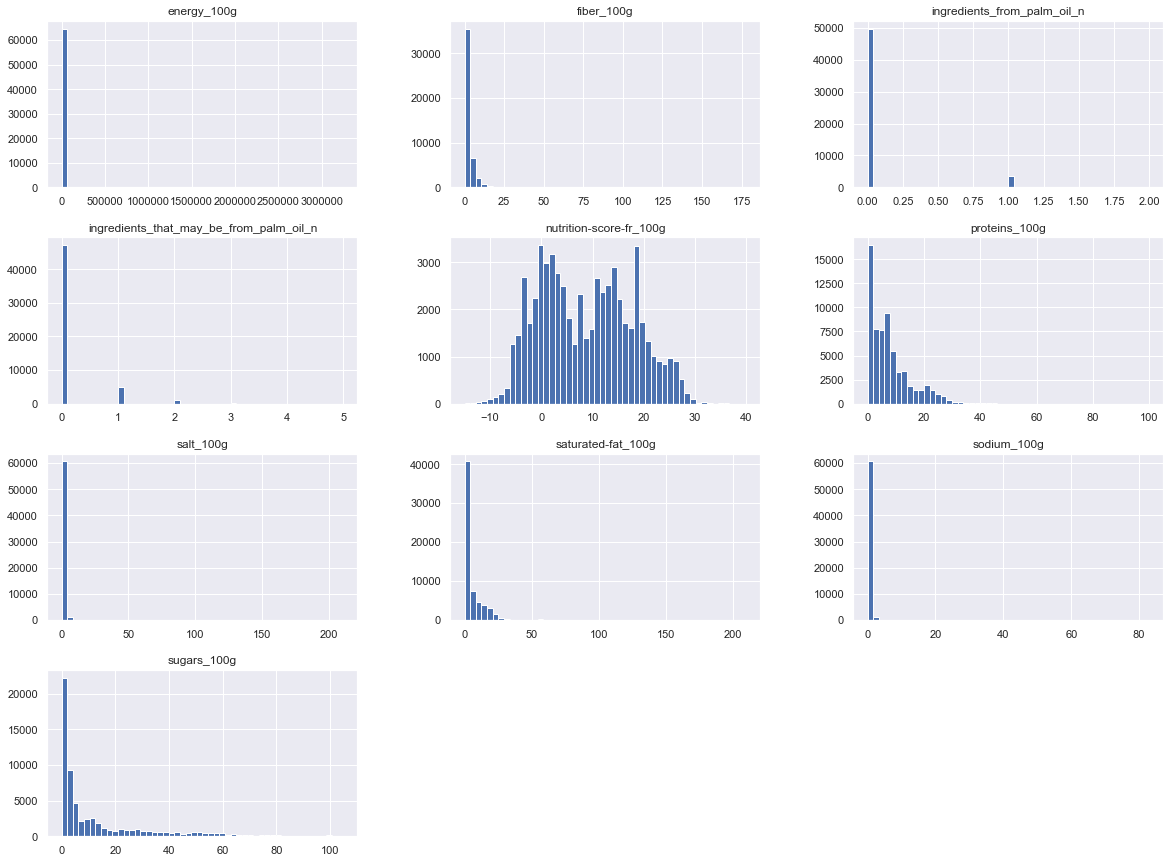

In [37]:
food_filtered_fr.hist(bins=50, figsize=(20,15))

### Affichage des tableaux de fréquence

In [38]:
from IPython.display import display, Markdown

def display_freq_table(col_names):
    for col_name in col_names:    
        effectifs = food_filtered_fr[col_name].value_counts(bins=5)

        modalites = effectifs.index # l'index de effectifs contient les modalités


        tab = pd.DataFrame(modalites, columns = [col_name]) # création du tableau à partir des modalités
        tab["Nombre"] = effectifs.values
        tab["Frequence"] = tab["Nombre"] / len(food_filtered_fr) # len(data) renvoie la taille de l'échantillon
        tab = tab.sort_values(col_name) # tri des valeurs de la variable X (croissant)
        tab["Freq. cumul"] = tab["Frequence"].cumsum() # cumsum calcule la somme cumulée
        
        display(Markdown('#### ' + col_name))
        display(tab)

In [39]:
display_freq_table(['nutrition-score-fr_100g','energy_100g','salt_100g','sodium_100g','sugars_100g','saturated-fat_100g','fiber_100g','proteins_100g','ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n'])

#### nutrition-score-fr_100g

,nutrition-score-fr_100g,Nombre,Frequence,Freq. cumul
3,"(-15.056, -4.0]",4984,0.050630,0.050630
0,"(-4.0, 7.0]",24248,0.246323,0.296952
1,"(7.0, 18.0]",21736,0.220805,0.517757
2,"(18.0, 29.0]",10332,0.104957,0.622714
4,"(29.0, 40.0]",115,0.001168,0.623883


#### energy_100g

,energy_100g,Nombre,Frequence,Freq. cumul
0,"(-3251.3740000000003, 650274.6]",64592,0.656156,0.656156
4,"(650274.6, 1300549.2]",0,0.000000,0.656156
3,"(1300549.2, 1950823.8]",0,0.000000,0.656156
2,"(1950823.8, 2601098.4]",0,0.000000,0.656156
1,"(2601098.4, 3251373.0]",1,0.000010,0.656166


#### salt_100g

,salt_100g,Nombre,Frequence,Freq. cumul
0,"(-0.212, 42.2]",62393,0.633818,0.633818
1,"(42.2, 84.4]",123,0.001249,0.635067
2,"(84.4, 126.6]",57,0.000579,0.635646
4,"(126.6, 168.8]",0,0.000000,0.635646
3,"(168.8, 211.0]",1,0.000010,0.635656


#### sodium_100g

,sodium_100g,Nombre,Frequence,Freq. cumul
0,"(-0.084, 16.6]",62388,0.633767,0.633767
1,"(16.6, 33.2]",125,0.001270,0.635037
2,"(33.2, 49.8]",57,0.000579,0.635616
4,"(49.8, 66.4]",0,0.000000,0.635616
3,"(66.4, 83.0]",1,0.000010,0.635626


#### sugars_100g

,sugars_100g,Nombre,Frequence,Freq. cumul
0,"(-0.206, 20.92]",48090,0.488521,0.488521
1,"(20.92, 41.94]",7805,0.079287,0.567808
2,"(41.94, 62.96]",4643,0.047166,0.614974
3,"(62.96, 83.98]",1515,0.015390,0.630364
4,"(83.98, 105.0]",462,0.004693,0.635057


#### saturated-fat_100g

,saturated-fat_100g,Nombre,Frequence,Freq. cumul
0,"(-0.211, 42.0]",61822,0.628017,0.628017
1,"(42.0, 84.0]",493,0.005008,0.633025
2,"(84.0, 126.0]",59,0.000599,0.633625
4,"(126.0, 168.0]",0,0.000000,0.633625
3,"(168.0, 210.0]",1,0.000010,0.633635


#### fiber_100g

,fiber_100g,Nombre,Frequence,Freq. cumul
0,"(-0.179, 35.6]",45604,0.463267,0.463267
1,"(35.6, 71.2]",92,0.000935,0.464202
2,"(71.2, 106.8]",26,0.000264,0.464466
4,"(106.8, 142.4]",0,0.000000,0.464466
3,"(142.4, 178.0]",1,0.000010,0.464476


#### proteins_100g

,proteins_100g,Nombre,Frequence,Freq. cumul
0,"(-0.101, 20.0]",58702,0.596323,0.596323
1,"(20.0, 40.0]",5391,0.054764,0.651087
2,"(40.0, 60.0]",130,0.001321,0.652408
3,"(60.0, 80.0]",57,0.000579,0.652987
4,"(80.0, 100.0]",38,0.000386,0.653373


#### ingredients_from_palm_oil_n

,ingredients_from_palm_oil_n,Nombre,Frequence,Freq. cumul
0,"(-0.003, 0.4]",49783,0.505719,0.505719
4,"(0.4, 0.8]",0,0.000000,0.505719
1,"(0.8, 1.2]",3632,0.036896,0.542615
3,"(1.2, 1.6]",0,0.000000,0.542615
2,"(1.6, 2.0]",51,0.000518,0.543133


#### ingredients_that_may_be_from_palm_oil_n

,ingredients_that_may_be_from_palm_oil_n,Nombre,Frequence,Freq. cumul
0,"(-0.006, 1.0]",52135,0.529612,0.529612
1,"(1.0, 2.0]",1039,0.010555,0.540167
2,"(2.0, 3.0]",253,0.002570,0.542737
3,"(3.0, 4.0]",33,0.000335,0.543072
4,"(4.0, 5.0]",6,0.000061,0.543133


#### NB : les fréquences ci-dessus ne sont pas de 100% car il y a des valeurs non renseignées

### Focus sur le nutrition score et nutrition grade

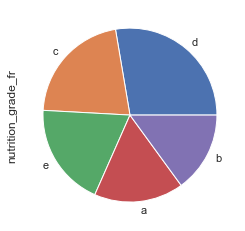

In [40]:
food_filtered_fr['nutrition_grade_fr'].value_counts().plot(kind='pie')

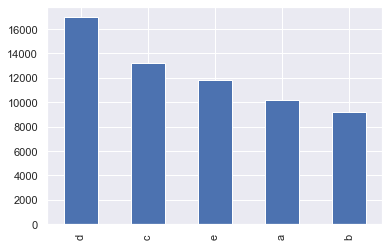

In [41]:
food_filtered_fr['nutrition_grade_fr'].value_counts().plot(kind='bar')

In [42]:
food_filtered_fr['nutrition-score-fr_100g'].unique()

array([ nan,  22.,  14.,  13.,  15.,  12.,   6.,  26.,  18.,  20.,  -2.,
         1.,  11.,  19.,   4.,   2.,   7.,  17.,   5.,  -4.,  25.,  -3.,
         0.,  23.,   3.,  16.,   9.,  24.,  21.,   8.,  -6.,  -1.,  10.,
        -5.,  29.,  35.,  27.,  28.,  -7.,  -9.,  36.,  32., -10.,  30.,
        -8.,  33.,  40., -11.,  31., -12.,  34., -13., -14., -15.])

#### Les valeurs sont bien comprises entre -15 et 40 : pas d'anomalie apparente quand le champ est renseigné

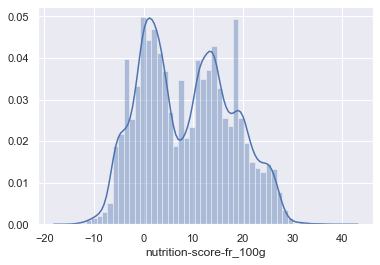

In [43]:
sns.distplot(food_filtered_fr[food_filtered_fr['nutrition-score-fr_100g'].notnull()]['nutrition-score-fr_100g'], kde=True)

## Analyse des features qualitatives

A compléter

## Suppression des valeurs incohérentes

A faire : supprimer les valeurs incohérentes notamment les proportions > 100g

# Rebut : Code divers / inutile pour l'instant

### Feature product_name

In [44]:
food_filtered_fr[food_filtered_fr['product_name'].duplicated(keep=False) & food_filtered_fr['product_name'].notnull()].count()

code                                       23572
last_modified_t                            23572
product_name                               23572
main_category_fr                           17849
brands                                     22127
brands_tags                                22126
nutrition-score-fr_100g                    15536
nutrition_grade_fr                         15536
energy_100g                                16372
salt_100g                                  15847
sodium_100g                                15847
sugars_100g                                15803
saturated-fat_100g                         15787
fiber_100g                                 10976
proteins_100g                              16296
ingredients_from_palm_oil_n                14886
ingredients_that_may_be_from_palm_oil_n    14886
pnns_groups_2                              18682
pnns_groups_1                              18210
labels_tags                                 8731
labels_fr           

In [45]:
food_filtered_fr[food_filtered_fr['product_name'].duplicated(keep=False) & food_filtered_fr['product_name'].notnull()].sort_values(['product_name']).head(500)

,code,last_modified_t,product_name,main_category_fr,brands,brands_tags,nutrition-score-fr_100g,nutrition_grade_fr,energy_100g,salt_100g,sodium_100g,sugars_100g,saturated-fat_100g,fiber_100g,proteins_100g,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,pnns_groups_2,pnns_groups_1,labels_tags,labels_fr,labels,countries_tags,additives_tags,image_url
315118,8714789999784,1463765792,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france,NaN,NaN
625,00052337,1491141098,,NaN,M&S,m-s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:france,en:united-kingdom",NaN,http://fr.openfoodfacts.org/images/products/00052337/front.3.400.jpg
184101,2494593019613,1479305341,1 Onglet,Viandes,Charal,charal,-1.0,a,641.0,0.190000,0.074803,0.0,3.9,NaN,19.0,0.0,0.0,Meat,Fish Meat Eggs,"fr:viande-francaise,en:green-dot,en:made-in-france,fr:origine-france,fr:viande-bovine-francaise","Viande Française,Point Vert,Fabriqué en France,Origine France,Viande Bovine Française","Point Vert,Origine France,Viande Bovine Française,Fabriqué en France",en:france,NaN,NaN
184100,2494593017787,1446369948,1 Onglet,Viandes,Charal,charal,0.0,b,656.0,0.199898,0.078700,0.0,4.8,NaN,19.0,0.0,0.0,Meat,Fish Meat Eggs,"fr:viande-francaise,fr:viande-bovine-francaise","Viande Française,Viande Bovine Française","Viande Bovine Française,Viande Française",en:france,NaN,http://fr.openfoodfacts.org/images/products/249/459/301/7787/front.5.400.jpg
236232,3512690000194,1451475239,10 Burgers,Surgelés,Isla Délice,isla-delice,17.0,d,1029.0,1.150000,0.452756,2.5,10.0,NaN,14.0,0.0,0.0,Meat,Fish Meat Eggs,en:halal,Halal,Halal,en:france,NaN,http://fr.openfoodfacts.org/images/products/351/269/000/0194/front.7.400.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245793,3596710343089,1464283098,Allumettes fumées,Lardons,Auchan,auchan,22.0,e,1112.0,2.794000,1.100000,0.3,9.6,0.0,17.0,0.0,0.0,Processed meat,Fish Meat Eggs,NaN,NaN,NaN,en:france,"en:e326,en:e262,en:e251",http://fr.openfoodfacts.org/images/products/359/671/034/3089/front.6.400.jpg
211231,3256224622505,1370745940,Allumettes lardons nature,Lardons,U,u,20.0,e,1098.0,2.540000,1.000000,0.5,8.8,1.0,18.2,0.0,0.0,Processed meat,Fish Meat Eggs,NaN,NaN,NaN,en:france,"en:e250,en:e301",http://fr.openfoodfacts.org/images/products/325/622/462/2505/front.7.400.jpg
211551,3256225426119,1483531129,Allumettes lardons nature,Lardons,U,u,19.0,e,1048.0,2.790000,1.098425,0.6,6.6,0.0,17.4,0.0,0.0,Processed meat,Fish Meat Eggs,"fr:viande-francaise,fr:viande-porcine-francaise","Viande Française,Viande Porcine Française",Le Porc français,en:france,"en:e250,en:e301",http://fr.openfoodfacts.org/images/products/325/622/542/6119/front.5.400.jpg
216263,3263856483312,1466845116,Allumettes nature,Lardons,Franprix,franprix,20.0,e,1016.0,2.300000,0.905512,0.7,7.4,NaN,17.0,0.0,0.0,Processed meat,Fish Meat Eggs,NaN,NaN,NaN,en:france,"en:e326,en:e250,en:e270,en:e262",NaN


In [46]:
sf=food_filtered_fr[food_filtered_fr['product_name'].duplicated() & food_filtered_fr['product_name'].notnull()].sort_values(['code']).sample(500)

In [47]:
food_filtered_fr.shape

(98440, 25)

### Features proportions pour 100g
energy_100g                                0.656166  
salt_100g                                  0.635656  
sodium_100g                                0.635626  
sugars_100g                                0.635057  
saturated-fat_100g                         0.633635  

fiber_100g                                 0.464476  
proteins_100g                              0.653373  



In [48]:
food_filtered[food_filtered['energy_100g'] == 0]['energy_100g'].count()

8909

In [49]:
food_filtered[food_filtered['energy_100g'] == 0]

,code,last_modified_t,product_name,main_category_fr,brands,brands_tags,nutrition-score-fr_100g,nutrition_grade_fr,energy_100g,salt_100g,sodium_100g,sugars_100g,saturated-fat_100g,fiber_100g,proteins_100g,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,pnns_groups_2,pnns_groups_1,labels_tags,labels_fr,labels,countries_tags,additives_tags,image_url
228,0000050413201,1489073107,Naturally Flavored Beverage Enhancer With Other Natural Flavors,NaN,Easter Unlimited Inc.,easter-unlimited-inc,NaN,NaN,0.0,2.382520,0.93800,0.0,NaN,NaN,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,en:united-states,"en:e330,en:e331,en:e955",NaN
243,0000105000011,1489055330,Chamomile Herbal Tea,NaN,Lagg's,lagg-s,NaN,NaN,0.0,0.762000,0.30000,NaN,NaN,NaN,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,en:united-states,NaN,NaN
244,0000105000042,1489055331,"Herbal Tea, Peppermint",NaN,Lagg's,lagg-s,NaN,NaN,0.0,0.010160,0.00400,NaN,NaN,NaN,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,en:united-states,NaN,NaN
245,0000105000059,1489055331,Linden Flowers Tea,NaN,Lagg's,lagg-s,NaN,NaN,0.0,0.000000,0.00000,NaN,NaN,NaN,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,en:united-states,NaN,NaN
247,0000105000196,1489096571,Apple & Cinnamon Tea,NaN,Lagg's,lagg-s,NaN,NaN,0.0,0.337820,0.13300,NaN,NaN,NaN,66.67,0.0,0.0,NaN,NaN,NaN,NaN,NaN,en:united-states,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320316,9373536635635,1489051565,Peppermint,NaN,Carrington Tea,carrington-tea,NaN,NaN,0.0,0.000000,0.00000,NaN,0.0,NaN,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,en:united-states,NaN,NaN
320320,9386639344939,1489141911,"Tropical Pepper Co., Trinidad Mustard Sauce",NaN,Tropical Pepper Co.,tropical-pepper-co,NaN,NaN,0.0,2.032000,0.80000,0.0,NaN,NaN,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,en:united-states,en:e100,NaN
320458,9421902583193,1489142922,Artesian Water,NaN,1907,1907,NaN,NaN,0.0,0.010160,0.00400,NaN,NaN,NaN,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,en:united-states,NaN,NaN
320501,9501071050204,1492428152,Jabal Akhdar Pure Natural Water,Eaux,"Pure Natural Water,Jabal Akhdar","pure-natural-water,jabal-akhdar",0.0,b,0.0,0.015113,0.00595,0.0,0.0,0.0,0.00,NaN,NaN,Non-sugared beverages,Beverages,NaN,NaN,NaN,en:سلطنة-عمان,NaN,NaN


In [50]:
food_filtered_fr.query('salt_100g > 100')

,code,last_modified_t,product_name,main_category_fr,brands,brands_tags,nutrition-score-fr_100g,nutrition_grade_fr,energy_100g,salt_100g,sodium_100g,sugars_100g,saturated-fat_100g,fiber_100g,proteins_100g,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,pnns_groups_2,pnns_groups_1,labels_tags,labels_fr,labels,countries_tags,additives_tags,image_url
232239,3423720002432,1485984093,Keeny Bio,Gâteaux,Bio Soleil,bio-soleil,22.0,e,1720.0,211.0,83.000000,26.7,3.33,0.741,6.3,0.0,0.0,Biscuits and cakes,Sugary snacks,"en:organic,en:eu-organic,en:palm-oil-free,fr:ab-agriculture-biologique","Bio,Bio européen,Sans huile de palme,AB Agriculture Biologique","Sans huile de palme,AB Agriculture Biologique,Bio européen",en:france,"en:e422,en:e322,en:e500,en:e415",NaN
233372,3445850070259,1488550094,Sel de Guérande Label Rouge,Sels,Le guerandais,le-guerandais,10.0,c,0.0,125.0,49.212598,0.0,0.00,0.000,0.0,0.0,0.0,unknown,unknown,"en:pgi,en:label-rouge,en:produced-in-bretagne","IGP,Label Rouge,Produit en Bretagne","IGP,Label Rouge,Produit en Bretagne",en:france,NaN,http://fr.openfoodfacts.org/images/products/344/585/007/0259/front.5.400.jpg


In [51]:
q = food_filtered_fr['salt_100g'].quantile(0.99)

In [52]:
q

10.0

In [53]:
food_filtered_fr[food_filtered_fr['salt_100g'] > q].sort_values("salt_100g")

,code,last_modified_t,product_name,main_category_fr,brands,brands_tags,nutrition-score-fr_100g,nutrition_grade_fr,energy_100g,salt_100g,sodium_100g,sugars_100g,saturated-fat_100g,fiber_100g,proteins_100g,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,pnns_groups_2,pnns_groups_1,labels_tags,labels_fr,labels,countries_tags,additives_tags,image_url
241185,3564700025345,1468938413,"Filets d'anchois, allongés, à l'huile d'olive",Poissons en conserve,"Ronde des Mers,Marque repère","ronde-des-mers,marque-repere",17.0,d,1422.0,10.10,3.976378,0.1,4.90,0.900,18.5,0.0,0.0,Fish and seafood,Fish Meat Eggs,NaN,NaN,NaN,en:france,NaN,http://fr.openfoodfacts.org/images/products/356/470/002/5345/front.5.400.jpg
189715,3033710582198,1459841266,Nouilles Asiatiques Saveur Poulet - 60 g - Maggi,Soupes,"Maggi,Nestlé","maggi,nestle",NaN,NaN,1581.0,10.16,4.000000,5.9,0.70,2.400,10.4,0.0,0.0,One-dish meals,Composite foods,NaN,NaN,NaN,en:france,"en:e621,en:e627,en:e631",http://fr.openfoodfacts.org/images/products/303/371/058/2198/front.15.400.jpg
197768,3176800031876,1432748037,Potabio au panais,Soupes,"Nat ali,Nature et aliments","nat-ali,nature-et-aliments",NaN,NaN,1266.0,10.16,4.000000,NaN,NaN,14.100,12.0,0.0,0.0,One-dish meals,Composite foods,"en:organic,en:eu-organic,en:fr-bio-01,fr:ab-agriculture-biologique","Bio,Bio européen,FR-BIO-01,AB Agriculture Biologique","Bio,Bio européen,FR-BIO-01,AB Agriculture Biologique",en:france,"en:e412,en:e415",http://fr.openfoodfacts.org/images/products/317/680/003/1876/front.9.400.jpg
190471,3039820230356,1490781984,Mouliné De Legumes Varies,NaN,La Potagere,la-potagere,11.0,d,1431.0,10.20,4.015748,11.0,0.90,5.500,7.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france,NaN,NaN
279262,5411788046237,1488742612,Bio Shoyu 500ML,NaN,Lima,lima,10.0,c,424.0,10.20,4.015748,0.4,0.00,0.800,10.4,NaN,NaN,unknown,unknown,"en:organic,en:eu-organic,fr:ab-agriculture-biologique","Bio,Bio européen,AB Agriculture Biologique","Bio,Bio européen,AB Agriculture Biologique",en:france,NaN,http://fr.openfoodfacts.org/images/products/541/178/804/6237/front.3.400.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226697,3346903025052,1489230853,Saliere sel fin,NaN,Les mousquetaires,les-mousquetaires,10.0,c,0.0,100.00,39.370079,0.0,0.00,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france,NaN,NaN
312021,8480017457707,1491811072,Sel fin de met iodé,Sels,Dia,dia,10.0,c,0.0,100.00,39.370079,0.0,0.00,0.000,0.0,NaN,NaN,unknown,unknown,NaN,NaN,NaN,en:france,NaN,NaN
198796,3183280013766,1489521080,Véritable sel de mer la baleine,NaN,La baleine,la-baleine,10.0,c,0.0,100.00,39.370079,0.0,0.00,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france,NaN,http://fr.openfoodfacts.org/images/products/318/328/001/3766/front.3.400.jpg
233372,3445850070259,1488550094,Sel de Guérande Label Rouge,Sels,Le guerandais,le-guerandais,10.0,c,0.0,125.00,49.212598,0.0,0.00,0.000,0.0,0.0,0.0,unknown,unknown,"en:pgi,en:label-rouge,en:produced-in-bretagne","IGP,Label Rouge,Produit en Bretagne","IGP,Label Rouge,Produit en Bretagne",en:france,NaN,http://fr.openfoodfacts.org/images/products/344/585/007/0259/front.5.400.jpg


In [54]:
sns.set_style("whitegrid")

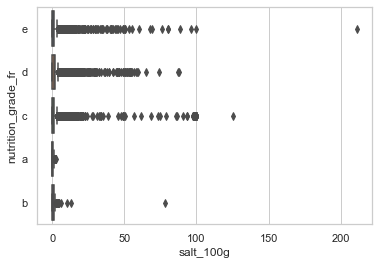

In [55]:
sns.boxplot(x='salt_100g', y='nutrition_grade_fr', data=food_filtered_fr)

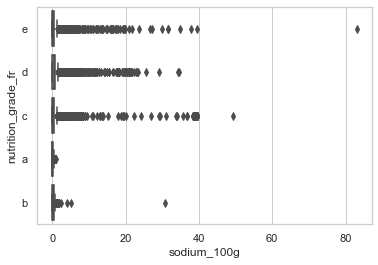

In [56]:
sns.boxplot(x='sodium_100g', y='nutrition_grade_fr', data=food_filtered_fr)

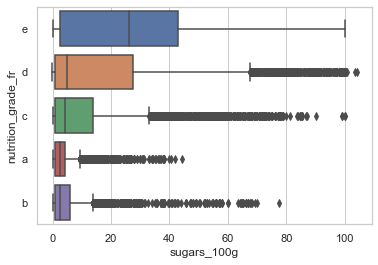

In [57]:
sns.boxplot(x='sugars_100g', y='nutrition_grade_fr', data=food_filtered_fr)

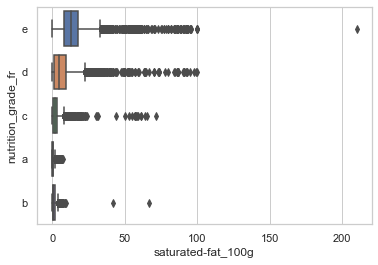

In [58]:
sns.boxplot(x='saturated-fat_100g', y='nutrition_grade_fr', data=food_filtered_fr)

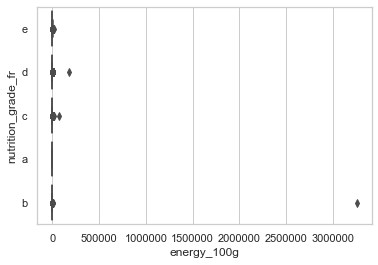

In [59]:
sns.boxplot(x='energy_100g', y='nutrition_grade_fr', data=food_filtered_fr)

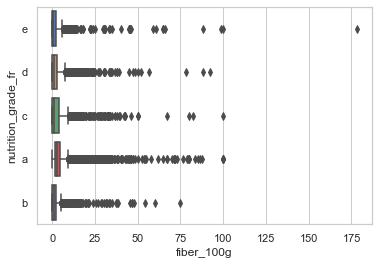

In [60]:
sns.boxplot(x='fiber_100g', y='nutrition_grade_fr', data=food_filtered_fr)

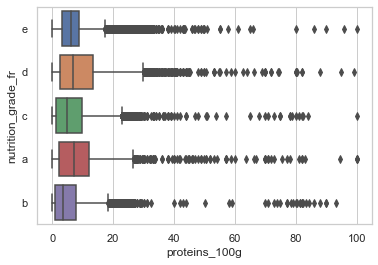

In [61]:
sns.boxplot(x='proteins_100g', y='nutrition_grade_fr', data=food_filtered_fr)

C:\Users\a42692\.conda\envs\FBO\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\a42692\.conda\envs\FBO\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


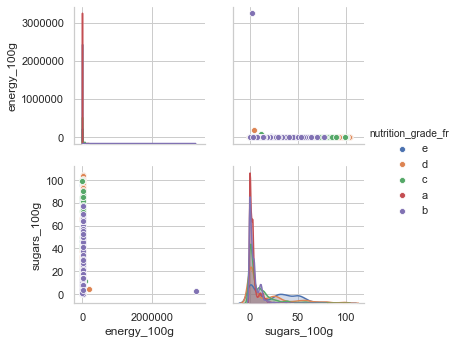

In [62]:
sns.pairplot(food_filtered_fr[['energy_100g', 'sugars_100g', 'nutrition_grade_fr']], hue='nutrition_grade_fr')

In [63]:
food_filtered_fr_energy_notnull = food_filtered_fr[food_filtered_fr['energy_100g'].notnull()]

In [64]:
food_filtered_fr_energy_notnull

,code,last_modified_t,product_name,main_category_fr,brands,brands_tags,nutrition-score-fr_100g,nutrition_grade_fr,energy_100g,salt_100g,sodium_100g,sugars_100g,saturated-fat_100g,fiber_100g,proteins_100g,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,pnns_groups_2,pnns_groups_1,labels_tags,labels_fr,labels,countries_tags,additives_tags,image_url
106,0000000036252,1489055667,Lion Peanut x2,NaN,Sunridge,sunridge,22.0,e,1883.0,0.09652,0.038000,57.50,12.50,2.5,2.50,0.0,0.0,unknown,unknown,NaN,NaN,NaN,"en:france,en:united-states",en:e322,http://fr.openfoodfacts.org/images/products/000/000/003/6252/front.4.400.jpg
138,0000000039529,1489055652,Pack de 2 Twix,NaN,"Twix, Lundberg","twix,lundberg",NaN,NaN,1481.0,NaN,NaN,NaN,NaN,6.2,6.25,NaN,NaN,unknown,unknown,NaN,NaN,NaN,"en:france,en:united-states",NaN,http://fr.openfoodfacts.org/images/products/000/000/003/9529/front.3.400.jpg
190,0000010187319,1487325954,Mini Confettis,NaN,Alice Délice,alice-delice,14.0,d,1753.0,0.01000,0.003937,87.70,0.80,0.9,0.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france,NaN,NaN
191,0000010207260,1490203757,Praliné Amande Et Noisette,NaN,Alice Délice,alice-delice,14.0,d,2406.0,0.00300,0.001181,50.30,2.90,3.9,9.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france,NaN,NaN
226,0000040608754,1439141731,"Pepsi, Nouveau goût !",Sodas,Pepsi,pepsi,13.0,e,177.0,0.02540,0.010000,10.40,0.00,0.0,0.00,0.0,0.0,Sweetened beverages,Beverages,NaN,NaN,NaN,en:france,"en:e150d,en:e338",http://fr.openfoodfacts.org/images/products/000/004/060/8754/front.5.400.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320740,9782211109758,1489003558,Verrine Cheescake Myrtille,NaN,Kayser,kayser,16.0,d,1084.0,0.29000,0.114173,10.50,12.00,0.0,8.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france,NaN,NaN
320741,9782401029101,1491508021,Fiche Brevet,NaN,Hatier,hatier,0.0,b,4.0,10.00000,3.937008,1.00,1.00,10.0,10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france,NaN,NaN
320751,9847548283004,1442237848,Tartines craquantes bio au sarrasin,Pains,Le Pain des fleurs,le-pain-des-fleurs,-4.0,a,1643.0,0.68000,0.267717,2.60,0.60,5.9,13.00,NaN,NaN,Bread,Cereals and potatoes,"en:organic,en:eu-organic,en:gluten-free,fr:ab-agriculture-biologique","Bio,Bio européen,Sans gluten,AB Agriculture Biologique","Bio,Bio européen,Sans gluten,AB Agriculture Biologique",en:france,NaN,http://fr.openfoodfacts.org/images/products/984/754/828/3004/front.3.400.jpg
320757,9900000000233,1491079939,Amandes,NaN,Biosic,biosic,0.0,b,2406.0,0.10000,0.039370,3.89,3.73,12.2,21.22,NaN,NaN,NaN,NaN,"en:organic,en:eu-organic,fr:ab-agriculture-biologique","Bio,Bio européen,AB Agriculture Biologique","Organic, EU Organic, fr:AB Agriculture Biologique",en:france,NaN,NaN


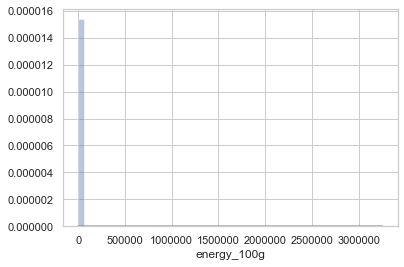

In [65]:
sns.distplot(food_filtered_fr_energy_notnull['energy_100g'], kde=True)

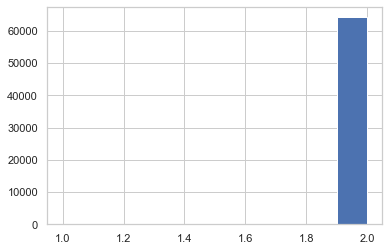

In [66]:
#food_filtered_fr_energy_notnull[food_filtered_fr_energy_notnull['energy_100g'] != 0]['energy_100g']
import numpy as np
f2 = pd.cut(food_filtered_fr_energy_notnull['energy_100g'], bins=[0., 1., np.inf], labels=[1,2])
f2.hist()

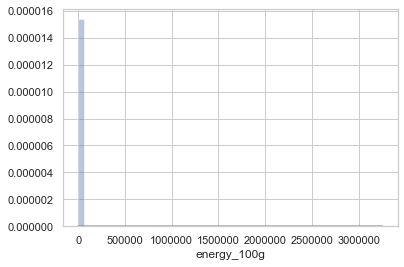

In [67]:
sns.distplot(food_filtered_fr_energy_notnull[food_filtered_fr_energy_notnull['energy_100g'] != 0]['energy_100g'], kde=True)

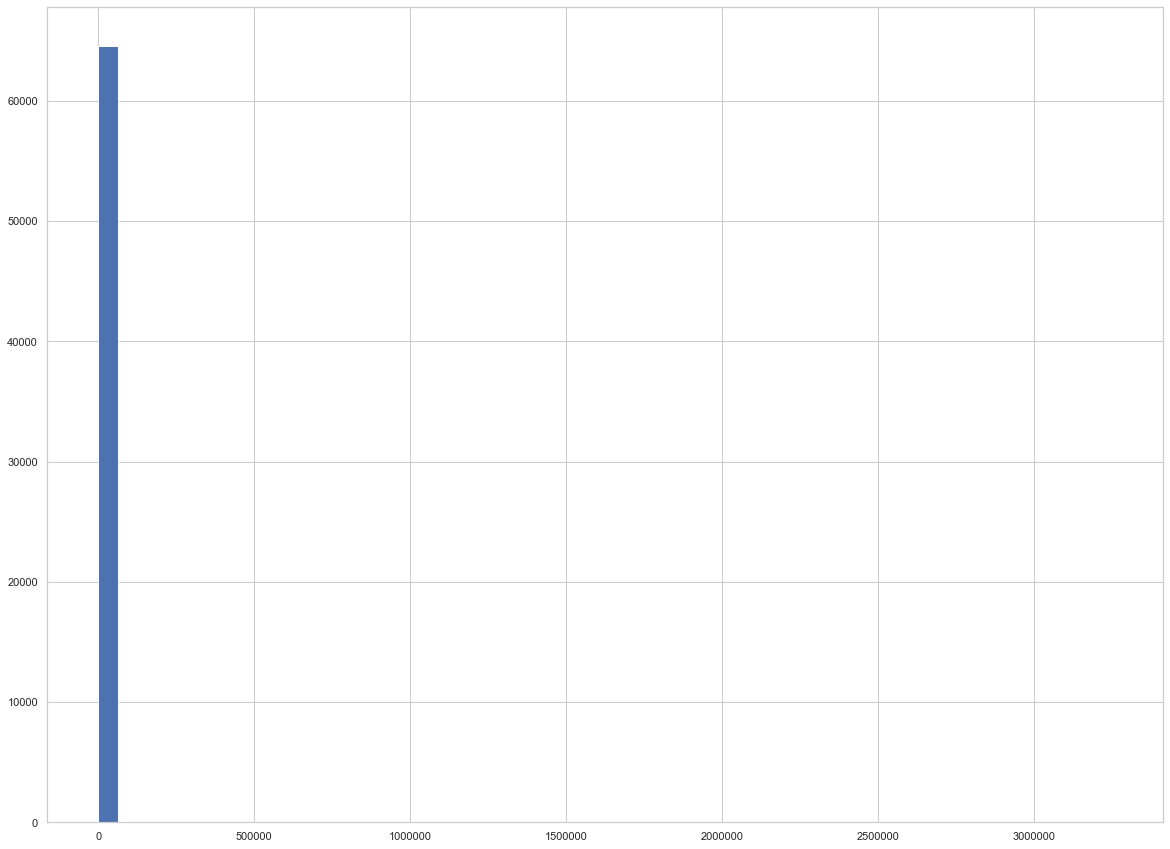

In [68]:
food_filtered_fr['energy_100g'].hist(bins=50, figsize=(20,15))

In [69]:
food_filtered_fr.query('energy_100g < 5000').shape

(64544, 25)

In [70]:
food_filtered_fr_energy_notnull[food_filtered_fr_energy_notnull['energy_100g'] == 0]['energy_100g']

886       0.0
6570      0.0
43001     0.0
45658     0.0
59742     0.0
         ... 
316876    0.0
317090    0.0
317399    0.0
317407    0.0
318526    0.0
Name: energy_100g, Length: 337, dtype: float64

In [71]:
food_filtered_fr.pnns_groups_2.unique()

array([nan, 'unknown', 'Legumes', 'Biscuits and cakes', 'Sweets',
       'Non-sugared beverages', 'Sweetened beverages', 'Meat',
       'One-dish meals', 'Soups', 'Chocolate products',
       'Alcoholic beverages', 'Sandwich', 'Cheese', 'Appetizers',
       'Dressings and sauces', 'Dried fruits', 'Nuts',
       'Breakfast cereals', 'Pizza pies and quiche', 'Fruits',
       'Fruit juices', 'Fats', 'Cereals', 'Vegetables', 'Bread',
       'Processed meat', 'vegetables', 'Ice cream', 'Fish and seafood',
       'pastries', 'Milk and yogurt', 'Dairy desserts', 'Tripe dishes',
       'Artificially sweetened beverages', 'Fruit nectars', 'Potatoes',
       'Eggs', 'Salty and fatty products', 'fruits', 'legumes', 'cereals'],
      dtype=object)

In [72]:
food_filtered_fr.pnns_groups_1.unique()

array([nan, 'unknown', 'Cereals and potatoes', 'Sugary snacks',
       'Beverages', 'Fish Meat Eggs', 'Composite foods',
       'Fruits and vegetables', 'Milk and dairy products', 'Salty snacks',
       'Fat and sauces', 'fruits-and-vegetables', 'sugary-snacks',
       'cereals-and-potatoes'], dtype=object)

In [73]:
pd.set_option("display.max_rows",10000)
pd.set_option("display.max_columns", 10000)

food_filtered_fr.labels_tags.unique()


array([nan, 'en:organic,en:eu-organic,fr:ab-agriculture-biologique',
       'en:green-dot', ...,
       'en:no-preservatives,en:halal,fr:sans-glutamate-de-sodium',
       'en:vegetarian,en:no-preservatives,en:vegan,en:halal,en:no-cholesterol,en:no-trans-fat',
       'en:low-or-no-sugar,en:no-sugar,fr:ne-pas-donner-aux-enfants-de-moins-de-5-ans'],
      dtype=object)

In [74]:
food_filtered_fr.additives_tags.unique()

array([nan, 'en:e322', 'en:e1400,en:e322,en:e503', ...,
       'en:e330,en:e300,en:e150d', 'en:e260,en:e415,en:e14xx',
       'en:e420,en:e955,en:e950,en:e470b'], dtype=object)